In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#DATA_PATH = 'E:/Edureka_Python-Course/Data Sources/Day_6/'
df_raw = pd.read_csv('cereal.csv', low_memory=False)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.7+ KB


In [4]:
len(df_raw.mfr.unique())

7

In [5]:
df_raw.head().transpose()

,0,1,2,3,4
name,100% Bran,100% Natural Bran,All-Bran,All-Bran with Extra Fiber,Almond Delight
mfr,N,Q,K,K,R
type,C,C,C,C,C
calories,70,120,70,50,110
protein,4,3,4,4,2
fat,1,5,1,0,2
sodium,130,15,260,140,200
fiber,10,2,9,14,1
carbo,5,8,7,8,14
sugars,6,8,5,0,8


(array([ 8.,  4., 13.,  6.,  7.,  9.,  9.,  5., 11.,  5.]),
 array([-1. ,  0.6,  2.2,  3.8,  5.4,  7. ,  8.6, 10.2, 11.8, 13.4, 15. ]),
 <a list of 10 Patch objects>)

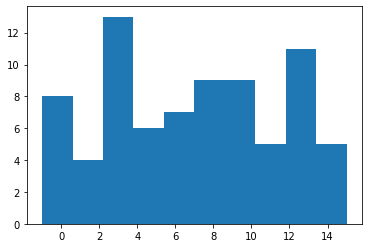

In [6]:
plt.hist(df_raw.sugars)

(array([ 8.,  0., 63.,  0.,  0.,  0.,  0.,  0.,  0.,  6.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

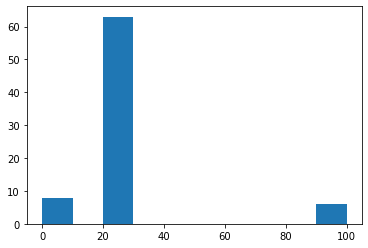

In [7]:
plt.hist(df_raw.vitamins)

In [8]:
mfr_names = {
    'N': 'Nabisco',
    'Q': 'Quaker Oats',
    'K': 'Kelloggs',
    'R': 'Raslston Purina',
    'G': 'General Mills' ,
    'P' :'Post' ,
    'A':'American Home Foods Products'
}

In [10]:
tmp_col = df_raw.mfr.copy()
tmp_col.replace(mfr_names, inplace=True)
tmp_col

0             Nabisco
1         Quaker Oats
2            Kelloggs
3            Kelloggs
4     Raslston Purina
5       General Mills
6            Kelloggs
7       General Mills
8     Raslston Purina
9                Post
10        Quaker Oats
11      General Mills
12      General Mills
13      General Mills
14      General Mills
15    Raslston Purina
16           Kelloggs
17           Kelloggs
18      General Mills
19           Kelloggs
20            Nabisco
21           Kelloggs
22      General Mills
23    Raslston Purina
24           Kelloggs
25           Kelloggs
26           Kelloggs
27               Post
28           Kelloggs
29               Post
           ...       
47      General Mills
48           Kelloggs
49           Kelloggs
50           Kelloggs
51      General Mills
52               Post
53           Kelloggs
54        Quaker Oats
55        Quaker Oats
56        Quaker Oats
57        Quaker Oats
58           Kelloggs
59      General Mills
60           Kelloggs
61    Rasl

In [11]:
df_raw['mfrName'] = tmp_col

In [12]:
df_raw

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfrName
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843,Raslston Purina
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541,General Mills
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094,Kelloggs
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562,General Mills
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253,Raslston Purina
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813,Post


In [13]:
unique_mfrs = df_raw.mfrName.unique()

unique_mfrs

array(['Nabisco', 'Quaker Oats', 'Kelloggs', 'Raslston Purina',
       'General Mills', 'Post', 'American Home Foods Products'],
      dtype=object)

In [19]:
mfr_cereals_manufactured = []
for each_mfr in unique_mfrs:
    mfr_cereals_manufactured.append(
        list(df_raw['mfrName']).count(each_mfr)
    )
mfr_cereals_manufactured

[6, 8, 23, 8, 22, 9, 1]

<BarContainer object of 7 artists>

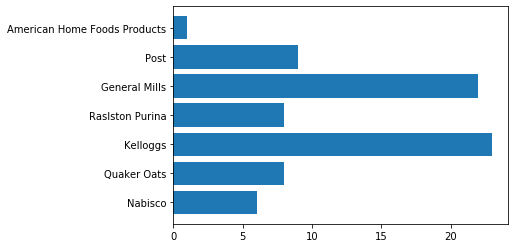

In [20]:
plt.barh(unique_mfrs, mfr_cereals_manufactured)

*Training  Phase

In [24]:
?train_test_split

In [92]:
y = df_raw.rating.copy()
x = df_raw._get_numeric_data().copy()

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [94]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
pred = linreg.predict(x_test)

In [97]:
mean_squared_error(y_test, pred)

1.1018809124127093e-27